# Objective

> 아래과 같은 수식을 automatically 만드는 코드를 작성

* ex1 :  (1 + 2) *3 + 5 * (2 + 3)
* ex2 :  3 - (2 + 3) - 5 * 2

cf) ~~나누기는 float을 발생시켜, 사친 연산 기호 중 ( +, -, /)만 구상할까 함~~,

나누기를 포함하면서 division by 0이 될 수 있으니 digit range에서 0을 제외함

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

## 수식에 필수적인 6가지 

> 아래의 이미지들을 만들어보자

* 왼괄호와 오른괄호 (())
* 더하기 (+)
* 빼기 (-)
* 곱하기 (*)
* 나누기 (/)

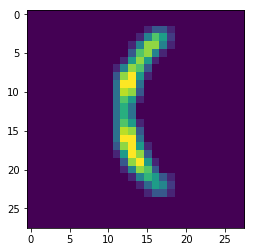

In [2]:
# 왼괄호가 잘 만들어지는지 확인
blank = np.zeros((28,28),np.uint8)
image = cv2.putText(blank,"(",(10,18),cv2.FONT_HERSHEY_DUPLEX,
                    0.6, 255)
left_bracket = cv2.GaussianBlur(image,(3,3),1)
plt.imshow(left_bracket)
plt.show()

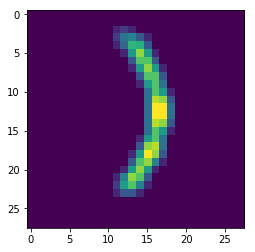

In [3]:
# 오른괄호가 잘 만들어지는지 확인
blank = np.zeros((28,28),np.uint8)
image = cv2.putText(blank,")",(10,18),cv2.FONT_HERSHEY_DUPLEX,
                    0.6, 255)
right_bracket = cv2.GaussianBlur(image,(3,3),1)
plt.imshow(right_bracket)
plt.show()

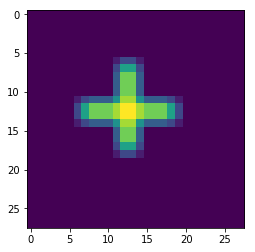

In [4]:
# 더하기가 잘 만들어지는지 확인
blank = np.zeros((28,28),np.uint8)
image = cv2.putText(blank,"+",(5,18),cv2.FONT_HERSHEY_DUPLEX,
                    0.6, 255)
plus = cv2.GaussianBlur(image,(3,3),1)
plt.imshow(plus)
plt.show()


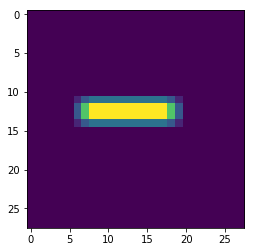

In [5]:
# 빼기가 잘 만들어지는지 확인
blank = np.zeros((28,28),np.uint8)
image = cv2.putText(blank,"-",(5,18),cv2.FONT_HERSHEY_DUPLEX,
                    0.6, 255)
minus = cv2.GaussianBlur(image,(3,3),1)
plt.imshow(minus)
plt.show()


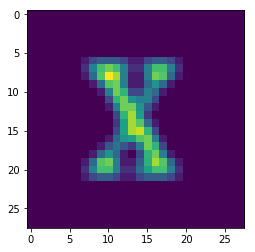

In [6]:
# 곱하기가 잘 만들어지는지 확인
blank = np.zeros((28,28),np.uint8)
image = cv2.putText(blank,"X",(7,20),cv2.FONT_HERSHEY_TRIPLEX,
                    0.6, 255)
multiply = cv2.GaussianBlur(image,(3,3),1)
plt.imshow(multiply)
plt.show()

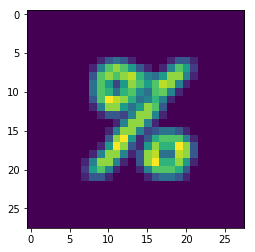

In [7]:
# 나누기가 잘 만들어지는지 확인
blank = np.zeros((28,28),np.uint8)
image = cv2.putText(blank,"%",(7,20),cv2.FONT_HERSHEY_TRIPLEX,
                    0.6, 255)
multiply = cv2.GaussianBlur(image,(3,3),1)
plt.imshow(multiply)
plt.show()

## 랜덤 수식 만들기

랜덤 수식을 만드는 순서는 아래와 같다.

1. 숫자를 N개 추출
    - ex) 1,5,2,4,5

2. 숫자를 연산할 연산자 N-1개 추출
    - ex) * , - , +, +
   
3. 괄호 후보군을 포함한 수식 전체 리스트 만들기
    * LB : 왼쪽 괄호가 들어갈 수 있는 곳
    * NUM : 숫자
    * RB : 오른쪽 괄호가 들어갈 수 있는 곳
    * OP : 연산자 들어갈 수 있는 곳

|index|0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|
|----|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|calculation|LB|NUM|RB|OP|LB|NUM|RB|OP|LB|NUM|RB|OP|LB|NUM|RB|OP|LB|NUM|RB|

4. 숫자와 연산자를 채워넣기

|index|0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|
|----|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|calculation|LB|1|RB|\*|LB|5|RB|\-|LB|2|RB|\+|LB|4|RB|\+|LB|5|RB|

5. 괄호의 숫자 n개 도출 후, 하나씩 결정


In [9]:
N = np.random.randint(5,15)

numbers = np.random.randint(1,9,size=N) # 숫자 N개 추출

cal_series = np.array([""]*(4*N),
                      dtype="<U{}".format(N)) # 괄호 후보군을 포함한 수식 전체 리스트 만들기


# 숫자와 연산자 채워넣기
cal_series[1::4] = numbers
ops = np.random.choice(["+","-","*","/"], len(cal_series[3::4]))
cal_series[3::4] = ops

# 괄호의 숫자 N개 도출
num_bracket = np.random.randint(1,np.ceil(N/2)+1) 

for _ in range(num_bracket):
    # 왼 괄호 위치 결정
    lb_candidate = np.random.randint(0, N)
    # 오른 괄호 위치 결정 -> 왼 괄호보다는 오른쪽에 있어야함
    rb_candidate = np.random.randint(lb_candidate, N)
    # 왼괄호/오른괄호 넣기
    cal_series[lb_candidate*4] = cal_series[lb_candidate*4] + "("
    cal_series[rb_candidate*4+2] = cal_series[rb_candidate*4+2] + ")"

calculation = "".join(list(cal_series[:-1]))
print(calculation)
eval(calculation)

5+1+(2/7+3*4-1/6-(7)/5-4*(1))


12.71904761904762

## 위가 핵심적인 코드 이를 통해 구현한 아래의 코드

In [10]:
import sys
sys.path.append("../")

from utils.dataset import CalculationDataset

In [15]:
test_set = CalculationDataset('test')
image, eq_result, series_len, equation = test_set[0:10]

ValueError: zero-size array to reduction operation minimum which has no identity

In [14]:
for i in range(image.shape[0]):
    plt.figure(figsize=(20,10))
    plt.title(equation[i])
    plt.imshow(image[i])
    plt.show()

NameError: name 'equation' is not defined

<Figure size 1440x720 with 0 Axes>

In [11]:
test_set = CalculationDataset('test', digit=np.random.randint(5,15))

In [12]:
image, eq_result, series_len, equation = test_set[0:10]

for i in range(image.shape[0]):
    plt.figure(figsize=(20,10))
    plt.title(equation[i])
    plt.imshow(image[i])
    plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity